In this guided project, we'll work with stock market data that was downloaded from [Yahoo Finance](https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly9hcHAuZGF0YXF1ZXN0LmlvLw&guce_referrer_sig=AQAAACqeo7O3m5On-juK7FxuzoCqoOPFts5ur3aCAMJaId3zZRZ9ZWJH9ddmV5w256fgodcyLlWIonvjLlz-av_AonrunbL8e99CyVhFSCovDj7zYOFmMe_OTR2MnxyVdygf66fZzWTidgfD9w6uJmRktUF6GRkPz9ZimwZ7vv2zTVxf) using the [yahoo_finance](https://pypi.org/project/yahoo-finance/) Python package. This data consists of the daily stock prices from 2007-1-1 to 2017-04-17 for several hundred stock symbols traded on the NASDAQ stock exchange, stored in the prices folder.  The download_data.py script in the same folder as the Jupyter notebook was used to download all of the stock price data. Each file in the prices folder is named for a specific stock symbol, and contains the:

* date -- date that the data is from.
* close -- the closing price on that day, which is the price when the trading day ends.
* open -- the opening price on that day, which is the price when the trading day starts.
* high -- the highest price the stock reached during trading.
* low -- the lowest price the stock reached during trading.
* volume -- the number of shares that were traded during the day.

In [2]:
import os
import pandas as pd

# Read the data from all CSV files from the prices folder into a 
# single data structure.

stock_prices = {}

for fn in os.listdir("prices"):
    # Get the name of the file without extension "aapl.csv" -> "aapl"
    name = fn.split(".")[0]
    stock_prices[name] = pd.read_csv(os.path.join("prices", fn))

In [3]:
stock_prices["aapl"].head()

,date,close,open,high,low,volume
0,2007-01-03,83.800002,86.289999,86.579999,81.899999,309579900
1,2007-01-04,85.659998,84.050001,85.949998,83.820003,211815100
2,2007-01-05,85.049997,85.770000,86.199997,84.400002,208685400
3,2007-01-08,85.470000,85.959998,86.529998,85.280003,199276700
4,2007-01-09,92.570003,86.450003,92.979999,85.150000,837324600


In [4]:
# Calculate the average closing price of each stock
avg_closing_prices = {}
for stock_sym in stock_prices:
    avg_closing_prices[stock_sym] = stock_prices[stock_sym]['close'].mean()

<BarContainer object of 560 artists>

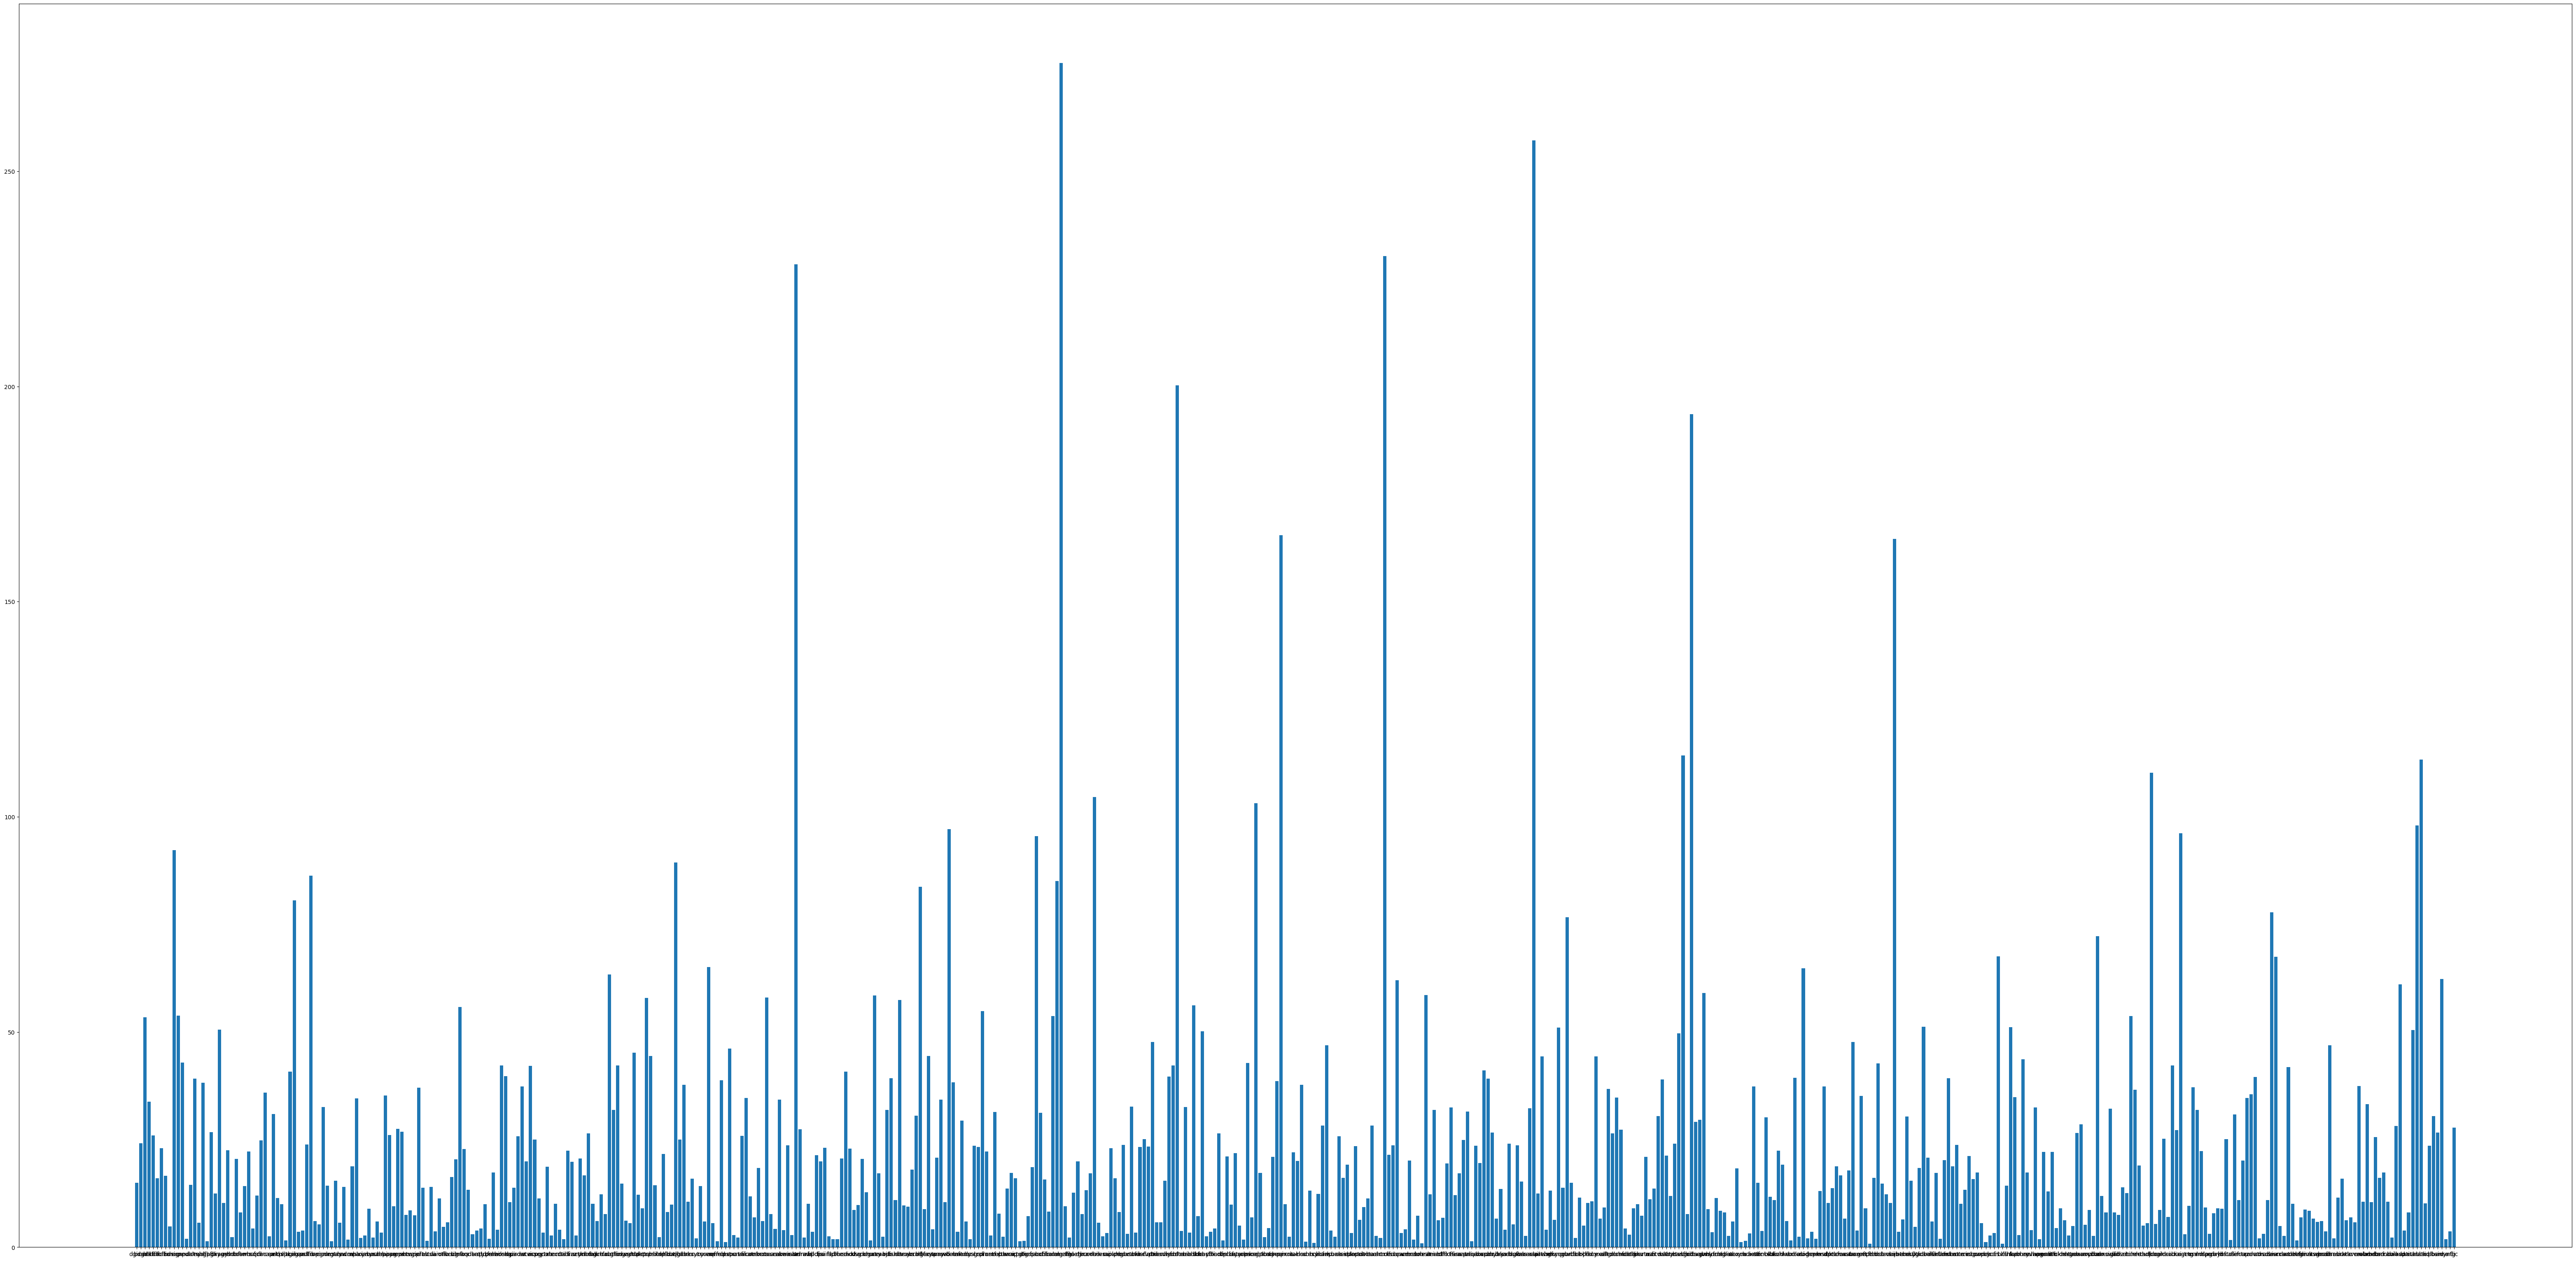

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
x = list(avg_closing_prices.keys())
y = list(avg_closing_prices.values())
plt.figure(figsize=(80, 40))
plt.bar(x, y)

In [14]:
pairs = [(avg_closing_prices[stock_sym], stock_sym) for key in avg_closing_prices]
pairs.sort()
print('Stock symbol with the minimum average closing price')
pairs[0]

Stock symbol with the minimum average closing price


(0.8122763011583011, 'blfs')

In [15]:
print('Stock symbol with the maximum average closing price')
pairs[-1]

Stock symbol with the maximum average closing price


(275.13407757104255, 'amzn')

## Organizing the trades per date

In [19]:
trades_by_date = {}
for stock_sym in stock_prices:
    for index,row in stock_prices[k].iterrows():
        date = row['date']
        volume = row['volume']
        pair = (volume, stock_sym)
        if date not in trades_by_date:
            trades_by_date[date] = []
        trades_by_date[date].append(pair)        

## Finding The Most Traded Stock Each Day

In [24]:
most_traded_by_date = {}

for date in trades_by_date:
    trades_by_date[date].sort()
    most_traded_by_date[date] = trades_by_date[date][-1]

In [27]:
# Checking the data structure
dates = ['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08']
for date in dates:
    print('Most traded stock on {}'.format(date))
    print(most_traded_by_date[date])

Most traded stock on 2007-01-03
(309579900, 'aapl')
Most traded stock on 2007-01-04
(211815100, 'aapl')
Most traded stock on 2007-01-05
(208685400, 'aapl')
Most traded stock on 2007-01-08
(199276700, 'aapl')


## Finding High Volume Days

In [43]:
daily_volumes = []

for date in trades_by_date:
    day_volume = sum([volume for volume, _ in trades_by_date[date]])
    daily_volumes.append((day_volume, date))

daily_volumes.sort(reverse = True)
print('Top 10 days with the most trade volume')
daily_volumes[:10]

Top 10 days with the most trade volume


[(1964583900, '2008-01-23'),
 (1770266900, '2008-10-10'),
 (1611272800, '2007-07-26'),
 (1599183500, '2008-10-08'),
 (1578877700, '2008-01-22'),
 (1559032100, '2008-02-07'),
 (1555072400, '2008-09-29'),
 (1553880500, '2007-11-08'),
 (1536176400, '2008-01-16'),
 (1533363200, '2008-01-24')]

## Finding the Most Profitable Stocks

In [32]:
percentages = []

for stock_sym in stock_prices:
    prices = stock_prices[stock_sym]
    initial = prices.loc[0, "close"]
    final = prices.loc[len(prices) - 1, "close"]
    percentage = 100 * (final - initial) / initial
    percentages.append((percentage, stock_sym))

percentages.sort(reverse = True)

percentages[:10]

[(7483.8389225948395, 'admp'),
 (4005.0000000000005, 'adxs'),
 (3898.6004898285596, 'arcw'),
 (2437.4365640858978, 'blfs'),
 (2230.7234281466817, 'amzn'),
 (1707.3554472785036, 'anip'),
 (1549.6700659868027, 'apdn'),
 (1525.162516251625, 'cui'),
 (1339.2137535980346, 'bcli'),
 (1330.0000666666667, 'achc')]

In [41]:
print("Initial price of ADMP's stock")
print(stock_prices['admp'].loc[0,'close'])
print("Final price of ADMP's stock")
print(stock_prices['admp'].loc[len(stock_prices['admp'])-1,'close'])

Initial price of ADMP's stock
0.059996
Final price of ADMP's stock
4.55


The most profitable stock to buy in 2007 would have been ADMP, which appreciated from around 6 cents to its current price of 4.55 dollars.